## Market Analysis for Ice video game store

###  Introduction
#### The purpose of this project is to figure out most successful video games in market and also look at some traits which adds to its success. It will also help Ice to design their advertising campaign. By this analysis we can do sales forecast for 2017. This project will also help us to investigate on most profitable game, platform for the company.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats as st


In [2]:
# reading the dataframe
df = pd.read_csv('/datasets/games.csv')

In [3]:
## changing the columns to lower case to avoid errors
df.columns = df.columns.str.lower()

In [4]:
# pring first 5 rows of dataframe
df.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# looking at all data types to make sure that they are in correct form
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Finding missing values
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# filling missing values with 0
df['critic_score']= df['critic_score'].fillna(0)

In [8]:
# filling NaN values
df['rating']= df['rating'].fillna('not_rated')

In [9]:
#filling missing values
df['year_of_release'] = df['year_of_release'].fillna(0)

In [10]:
# checking duplicate rows
df.duplicated().sum()

0

In [11]:
df['name'].duplicated().sum()

5155

In [12]:
df['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [13]:
df['platform'].duplicated().sum()

16684

In [14]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [15]:
df['year_of_release'].duplicated().sum()

16677

In [16]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,    0., 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [17]:
df['rating'].duplicated().sum()

16706

In [18]:
# looking for tricky duplicates
print(df.duplicated(subset= ['name', 'platform','year_of_release'], keep = False).sum())


4


#### There were no tricky duplicates found

In [19]:
df['year_of_release'] = df['year_of_release'].astype(int)

#### The year_of_release has been converted to integer as it was float before. I filled the missing values with 0 so that the calculations can be done easily.

In [20]:
## check if data has zero and converting to numeric values 
df['user_score'] = pd.to_numeric(df['user_score'], errors ='coerce')

In [21]:
# Reviewer's code 2
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [22]:
# filling missing values
df['user_score']= df['user_score'].fillna(0)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,not_rated
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,not_rated


In [23]:
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [24]:
df.isna().sum()

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [25]:
df.dropna()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,not_rated
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,not_rated
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,not_rated
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,not_rated
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,not_rated
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,not_rated


#### From above graph I noticed that a platform takes around 8 years to fade away. As we see DS platform from 2007 to 2013 (6 years), PS2 from 2007 to 2011(4 years), PSP from 2007 to 2015(8 years). These are some examples from the box plot above. 


##### I have to change the user_score column to float but I notice some of the scores have 'tbd' because user is still deciding. As string cannot be converted to float  So for our analysis to happen hassel free I have dropped those rows. I assume the data was automatically collected, and some games just do not have enough scores to have some average. The scores columns we have here represent the averages.The data can be missing because maybe the data entry personnel forgot to enter data. Maybe some data was still in processing. Thats why it might be missing.

In [26]:
# Handle erroneous data
df = df[~((df['platform'] == 'DS') & (df['year_of_release'] > 0) & (df['year_of_release'] < 2004))]

## New Column

In [27]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,not_rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,not_rated,31.38


### I noticed that a platform takes around 8 years to fade away so if we want to forecast for 2017 we would only need the data which is under 8 years. The data more than 8 years is not very useful for our analysis.

## Analysis of Data

In [28]:
game_released =df.groupby('year_of_release')['name'].count()
game_released.head(50)

year_of_release
0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      13
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

### As I am looking at the games released in different years I noticed highest amount of games were released from 2007 to  2011 maybe because entry to the market for new competitors were easier or government policies were linient so you can create and release more games. Another reason the demand increased a lot. 
     

### Games with most sales is Grand Theft Auto V followed by Mario Kart Wii. The games with worst performance G1 Jockey 4 2008, Seisou no Amazones and Cabbage Patch kids.


In [29]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending= False)
platform_sales


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.10
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [30]:
top_platform = platform_sales.nlargest(10)
top_platform

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.10
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

In [31]:
filter_df= df[df['year_of_release']!= 0]
platform_yearly_sales = filter_df.groupby(['platform','year_of_release'])['total_sales'].count().reset_index()
platform_yearly_sales.tail(50)

,platform,year_of_release,total_sales
187,SNES,1995,54
188,SNES,1996,30
189,SNES,1997,4
190,SNES,1998,2
191,SNES,1999,1
192,TG16,1995,2
193,WS,1999,2
194,WS,2000,2
195,WS,2001,2
196,Wii,2006,44


##### In above data I noticed that a platform takes around 4-8 years to fade away. If we look at data for Wii it came in market in 2006 and it was at its peak in 2009 and then it started fading away and in 2016 we just see sales of 1. I would say newer platforms take 1-2 years to become popular and a year or 2 to fade away as well.

In [32]:
df= df[df['year_of_release']!= 0]

platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending= False)
platform_sales

top_5 = platform_sales.index[:5]
top_platform_data = df[df['platform'].isin(top_5)]
yearly = top_platform_data.groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()


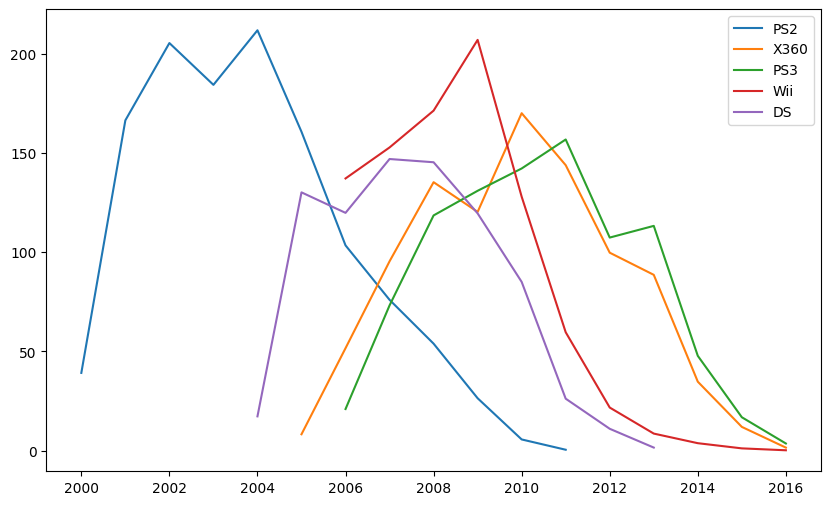

In [33]:
plt.figure(figsize=(10,6))

for platform in top_5:
    platform_data = df[df['platform'] == platform]
    yearly_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform)

plt.legend()


#### From the above platform data we can interpret that PS2 and DS has shrinked. As PS2 have no sales from 2011 and DS has stopped the sales in 2013. PS2 was at its peak in 2004 and WII was in 2009.

In [34]:
df['number_of_years'] = (2016 - df['year_of_release']).sort_values()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,number_of_years
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,10
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,not_rated,40.24,31
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,8
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,7
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,not_rated,31.38,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,not_rated,0.01,0
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,not_rated,0.01,10
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,not_rated,0.01,0
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,not_rated,0.01,13


#### In the above data I got the number of years of a platform so that I can get data which is under 5 years as it will be the most recent data and good for our future analysis.

In [35]:
df_2017 = df[df['number_of_years']< 5]
df_2017

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,number_of_years
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,3
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,3
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,not_rated,14.63,1
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,not_rated,14.60,3
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,not_rated,0.01,0
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,not_rated,0.01,2
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,not_rated,0.01,0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,not_rated,0.01,0


In [36]:
#Looking at the performance one of the top performing platform

total_platform = df_2017.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
platform_sales = pd.DataFrame(total_platform)
game_counts = df_2017.groupby('platform')['name'].count()
platform_sales['game_counts'] = game_counts
platform_sales

,total_sales,game_counts
platform,,
PS4,314.14,392
PS3,288.79,493
X360,236.54,292
3DS,194.61,396
XOne,159.32,247
WiiU,82.19,147
PC,62.65,250
PSV,49.18,411
Wii,35.37,54


## In the data above we can see the number of games by the plaform breakdown. Top performing platforms are PS4, PS3 and X360. PS3 released most of the games.

In [37]:
df_2017= df_2017[df_2017['year_of_release']!= 0]
platform_sales_2017 = df_2017.groupby('platform')['total_sales'].sum().sort_values(ascending= False)
platform_sales_2017

top_5 = platform_sales_2017.index[:5]
top_platform_data_2017 = df_2017[df_2017['platform'].isin(top_5)]
yearly_2017 = top_platform_data_2017.groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()


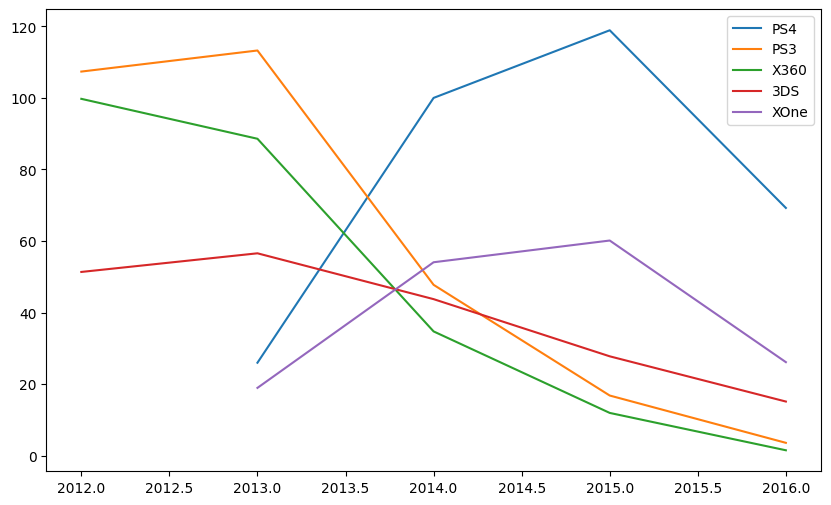

In [38]:
# # Plotting top performing platforms on line graph for better visualization

plt.figure(figsize=(10,6))

for platform in top_5:
    platform_data_2017 = df_2017[df_2017['platform'] == platform]
    yearly_sales_2017 = platform_data_2017.groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales_2017.index, yearly_sales_2017.values, label=platform)

plt.legend()


### Top performing platforms are PS4, XOne and 3DS based on above line graph. PS4's had highest total sale of around 120 million USD in 2015.

In [39]:
# Reviewer's code 4

df_2017.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<Figure size 1200x600 with 0 Axes>

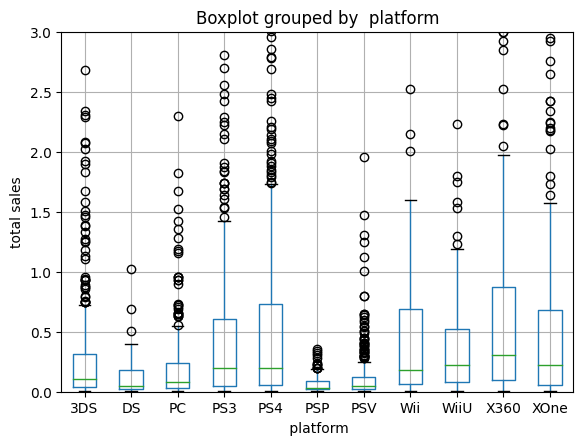

In [40]:
## Plotting 3DS platform on box plot for better visualization over years 
plt.figure(figsize=(12, 6))
df_2017.boxplot(column ='total_sales', by = 'platform')
plt.title('Boxplot grouped by  platform')
plt.xlabel(' platform')
plt.ylabel('total sales')
plt.ylim([0,3])
plt.suptitle('')
plt.show()


#####  The median for X360  is around 0.3 millions USD followed by XOne which is around 0.2 millions USD and 3DS is 0.1 millions USD.  Based on the box plot X360 is very popular platform. As majority of cutomer are using its video games.

# Critic score vs User score

In [41]:
df_2017['critic_score_rescaled'] = df_2017['critic_score'] / 10

In [42]:
df_filtered= df_2017[df_2017['critic_score_rescaled']!=0]

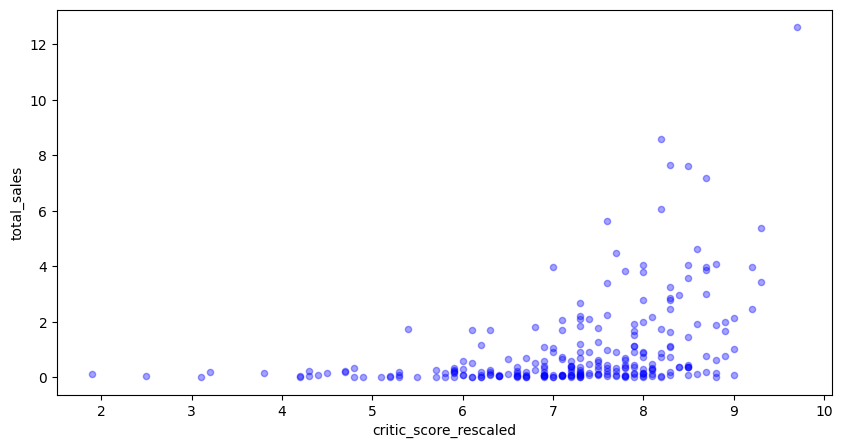

In [43]:
plat_PS4= df_filtered[df_filtered['platform'] == 'PS4']
plat_PS4.plot(kind='scatter', x='critic_score_rescaled', y= 'total_sales', figsize=[10,5], color= 'blue', alpha =0.36)
plt.show()

In [44]:
df_filter= df_2017[df_2017['user_score']!=0]

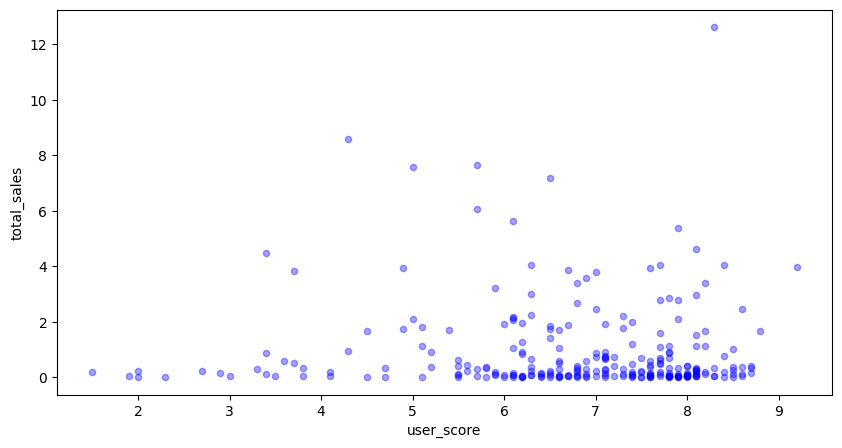

In [45]:
plat_PS4= df_filter[df_filter['platform'] == 'PS4']
plat_PS4.plot(kind='scatter', x='user_score', y= 'total_sales',figsize=[10,5], color= 'blue', alpha =0.36)
plt.show()

#### Comparision between critic score and user score. The user scores have negative affect on sales. We can see in the graph above as total sale increases the user score decreases. But that is not true for critic score.

In [46]:
print(plat_PS4[['critic_score_rescaled', 'total_sales']].corr())

                       critic_score_rescaled  total_sales
critic_score_rescaled               1.000000     0.351933
total_sales                         0.351933     1.000000


In [47]:
print(plat_PS4[[ 'user_score', 'total_sales']].corr())

             user_score  total_sales
user_score     1.000000    -0.031957
total_sales   -0.031957     1.000000


#### For platform PS4 there is negative correlation between user score and total sales which means as the total sales increases the user score decreases. There is medium correlation between critic score and total sales.

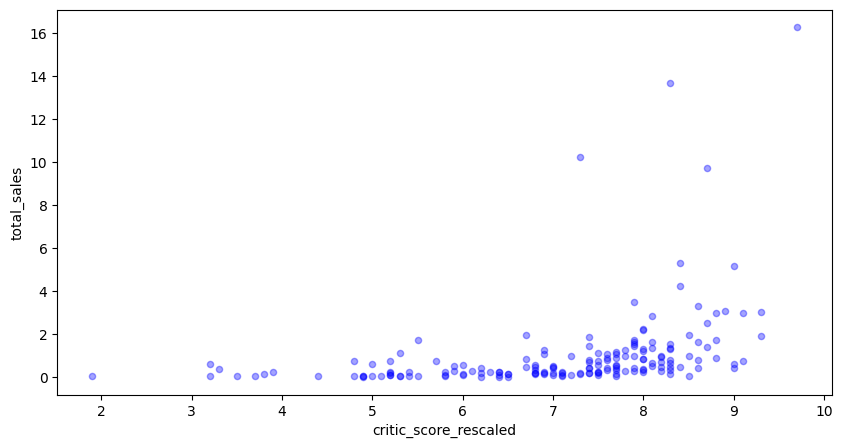

In [48]:
plat_X360 = df_filtered[df_filtered['platform'] == 'X360']
plat_X360.plot(kind='scatter', x='critic_score_rescaled', y= 'total_sales', figsize=[10,5], color= 'blue', alpha =0.36)
plt.show()

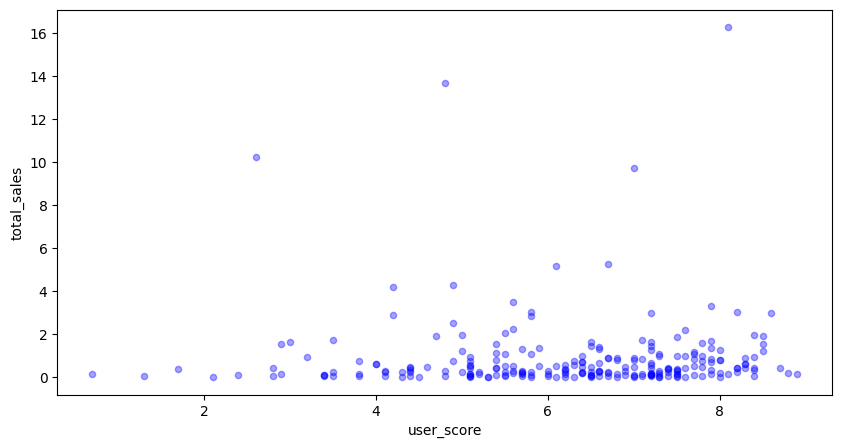

In [49]:
plat_X360= df_filter[df_filter['platform'] == 'X360']
plat_X360.plot(kind='scatter', x='user_score', y= 'total_sales',figsize=[10,5], color= 'blue', alpha =0.36)
plt.show()

##### The scores have minimal affect on sales. So it means that X360 sales was high because user and critics have similar review about the platform. Maybe X360 platforms have games which are similar reviews. Only very few games may have very high reviews. 

In [50]:
print(plat_X360[['critic_score_rescaled', 'total_sales']].corr())

                       critic_score_rescaled  total_sales
critic_score_rescaled               1.000000     0.255861
total_sales                         0.255861     1.000000


In [51]:
print(plat_X360[[ 'user_score', 'total_sales']].corr())

             user_score  total_sales
user_score     1.000000     0.006164
total_sales    0.006164     1.000000


#### There is little correlation between critic score and total sales .There is no relation between user score and total sales.

In [52]:
total_game= df_2017[df_2017['name'] == 'Call of Duty: Black Ops II' ]
total_game.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,number_of_years,critic_score_rescaled
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,4,8.3
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68,4,8.3
1227,Call of Duty: Black Ops II,PC,2012,Shooter,0.64,0.69,0.00,0.19,74.0,4.2,M,1.52,4,7.4
4706,Call of Duty: Black Ops II,WiiU,2012,Shooter,0.20,0.18,0.00,0.03,81.0,6.9,M,0.41,4,8.1


####  We can see in above data the game Call of Duty Black Ops II has higher sales for PS3 platform than X360.

In [53]:
total_genre = df_2017.groupby('genre')['total_sales'].sum().sort_values(ascending = False)
total_genre

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64

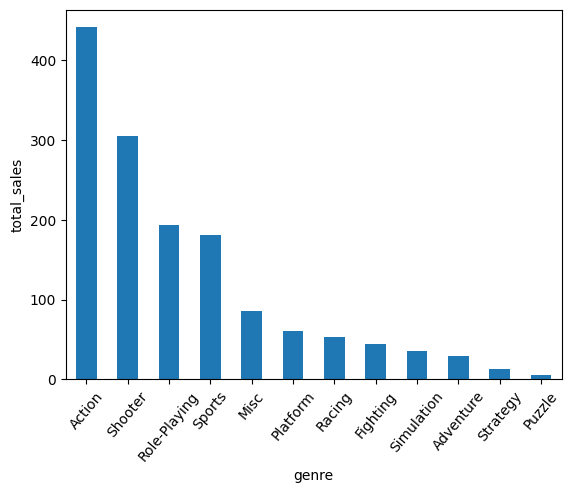

In [54]:
## showing genre breakdown by total sales
total_genre.plot(kind = 'bar',
                 x = 'genre', 
                 y = 'total_sales',
                 xlabel = 'genre',
                 ylabel = 'total_sales',
                 rot= 50)
plt.show()

## As we see the genre graph we can infer that the action games have most sales followed by shooter games. So the most profitable genre is action games. The genre with least profit is puzzle games. 

<Figure size 1000x10000 with 0 Axes>

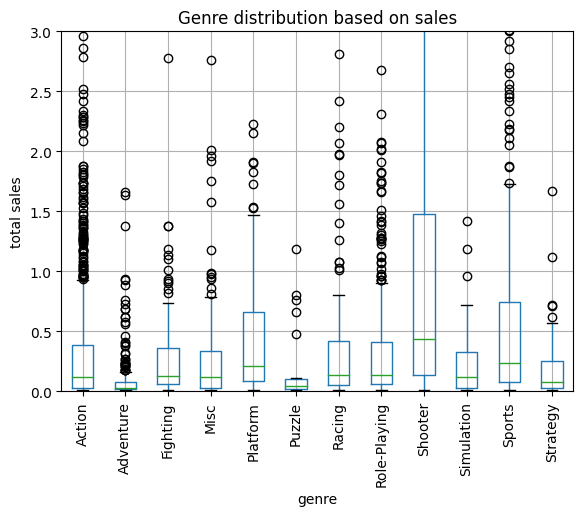

In [55]:
## showing genre breakdown by total sales
plt.figure(figsize=(10, 100))
df_2017.boxplot(column ='total_sales', by = 'genre')
plt.title('Genre distribution based on sales')
plt.xlabel('genre')
plt.ylabel('total sales')
plt.ylim([0,3])
plt.xticks(rotation=90)
plt.suptitle('')
plt.show()

##### Shooter games have median it looks like around 0.45 million usd and others have median much lower. So shooter games are more popular than sports games as sports games have the median of 0.2 million usd followed by action games with 0.15 million usd as median.

In [56]:
total_platform_avg = df_2017.groupby('platform')['total_sales'].median().sort_values()
total_platform_avg

platform
PSP     0.03
DS      0.05
PSV     0.05
PC      0.08
3DS     0.11
Wii     0.18
PS3     0.20
PS4     0.20
WiiU    0.22
XOne    0.22
X360    0.31
Name: total_sales, dtype: float64

#### When we are observing the medians of different platforms we see that X360, XOne and WiiU has the highest median. Most of the data for X360 will be closer to 0.31. 

# NA region

In [57]:
total_share = df_2017['total_sales'].sum()
total_share

1446.5300000000002

In [58]:
NA = df_2017.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
NA

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

In [59]:
NA = df_2017.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
NA.head()

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

### NA's  top 5 platform are X360, PS4, PS3, XOne, 3DS and top 5 genres are action, shooter, sports, role playing and misc. X360 is top performing platform in NA region.

In [60]:
total_na = df_2017['na_sales'].sum()
total_na

590.97

In [61]:
na_share = total_na / total_share
na_share

0.40854320339018196

#### NA has 40 % of the market share

# EU region

In [62]:
EU = df_2017.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
EU.head()

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

In [63]:
EU = df_2017.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
EU.head()

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

### EU's  top 5 platforms are PS4, PS3, X360, XOne, 3DS and the top 5 genres are action, shooter, sports, role playing, racing. PS4 is top performing platform in EU region.

In [64]:
total_eu = df_2017['eu_sales'].sum()
total_eu

506.82000000000005

In [65]:
eu_share = total_eu / total_share
eu_share


0.3503695049532329

#### EU has 35 % of the market share

# JP region

In [66]:
JP = df_2017.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
JP.head()

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

In [67]:
JP = df_2017.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
JP.head()

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

### JP's top 5 platform are 3DS, PS3, PSV, PS4, WiiU. 3DS is top performing platform in JP region. The  top 5 genres are role playing, action, misc, simulation, fighting.

In [68]:
total_jp = df_2017['jp_sales'].sum()
total_jp

192.58

In [69]:
jp_share = total_jp / total_share
jp_share


0.13313239269147545

#### JP has 13 % of the market share

## When comparing all 3 regions genres we can see action, shooter and sports are very popular in NA and EU regions. It looks like JP regions interests are little different than NA and EU as its popular genres are role playing and action. While observing at the market share I can say NA region has most market share followed by EU and JP.

In [70]:
df_rating= df_2017.groupby(['platform','genre','rating'])['total_sales'].sum().sort_values(ascending=False)
df_rating

platform  genre         rating   
PS3       Action        M            68.15
X360      Shooter       M            67.03
3DS       Role-Playing  not_rated    60.75
PS4       Action        M            55.15
PS3       Shooter       M            54.37
                                     ...  
Wii       Racing        not_rated     0.01
PC        Puzzle        E10+          0.01
PSV       Puzzle        E10+          0.01
          Platform      T             0.01
Wii       Adventure     not_rated     0.01
Name: total_sales, Length: 361, dtype: float64

#### As we can see in above data that mature rating contributes towards higher total sales. As adults are playing these games and they have more purchasing power than the teenagers.

## Testing Hypothesis

In [71]:
avg_genre_action = df_filter[df_filter['genre'] == 'Action']['user_score'].dropna()
avg_genre_sport = df_filter[df_filter['genre'] == 'Sports']['user_score'].dropna()

alpha= 0.05

tstat, pvalue = st.ttest_ind(avg_genre_action, avg_genre_sport)

print('pvalue:', pvalue)

if (pvalue < alpha):
    print ("we can reject the hypothesis")
else:
    print ("we can't reject the hypothesis")

pvalue: 3.7163089460934874e-26
we can reject the hypothesis


### Null hypothesis is that the action and sports user ratings are same. Alternate hypothesis is that the user ratings are different. As we rejected the hypothesis that means the genres ratings are different. As pvalue is  3.71 that means 300 % probability of them being different. The probability is so high there is significant difference between two genres ratings.

In [72]:
avg_platform_XOne = df_filter[df_filter['platform']== 'XOne']['user_score'].dropna()
avg_platform_PC = df_filter[df_filter['platform']== 'PC']['user_score'].dropna()

alpha= 0.05

tstat, pvalue = st.ttest_ind(avg_platform_XOne, avg_platform_PC)

print('pvalue:', pvalue)

if (pvalue < alpha):
    print ("we can reject the hypothesis")
else:
    print ("we can't reject the hypothesis")
    

pvalue: 0.5535080500643661
we can't reject the hypothesis


### Null hypothesis is that the platform XOne and PC user ratings are same. Alternate hypothesis is that the user ratings are different. As we can't reject the hypothesis that means the platforms ratings are same. As pvalue is 0.55 that means there is 6% probability of the user rating being same.

# Conclusion



NA region contributes to the most sales of the video games and most of the games with mature ratings are the best sellers. It could be because the adults are interested in action video games and they have more buying power.NA's top 5 platform are X360, PS4, PS3, XOne, 3DS and top 5 genres are action, shooter, sports, role playing and misc. X360 is top performing platform in NA region.

EU's top 5 platforms are PS4, PS3, X360, XOne, 3DS and the top 5 genres are action, shooter, sports, role playing, racing. PS4 is top performing platform in EU region.

JP's top 5 platform are 3DS, PS3, PSV, PS4, WiiU. 3DS is top performing platform in JP region. The top 5 genres are role playing, action, misc, simulation, fighting.

When comparing all 3 regions genres we can see action, shooter and sports are very popular in NA and EU regions. It looks like JP regions interests are little different than NA and EU as its popular genres are role playing and action. While observing at the market share I can say NA region has most market share followed by EU and JP.

As I am looking at the games released in different years I noticed highest amount of games were released from 2007 to 2011 maybe because entry to the market for new competitors were easier or government policies were linient so you can create and release more games. Another reason could be that the demand increased a lot during those years. It could be that the people started doing less outdoor activities and started to spend more time at home so you need entertainment at home.

I noticed that a platform takes around 4-8 years to fade away.I would say newer platforms take 2 years to become popular and a year or 2 to fade away as well. The top platforms with potential of growth in 2017 will be PS4, XOne, 3DS.

As we see the genre graph we can infer that the action games have most sales followed by shooter games. So the most profitable genre is action games. The genre with least profit is puzzle games.But when we looked at the median we got better picture and found out Shooter games have median it looks like around 0.5 million usd and others have median much lower. So shooter games are more popular than action games. But when we look at median of platforms X360 has highest median. The game 'Call of Duty Black Ops II' has higher sales for PS3 platform than X360.

Mature rating contributes towards higher total sales. As adults are playing these games and they have more purchasing power than the teenagers. As action and shooter games in NA and EU regions contribute most to total sales.

As we observed genre testing pvalue is 3.71 that means 300% probability of them being different. The probability is high so there is significant difference between two genres (action & sports) user ratings.

As we observed platform testing pvalue is 0.6 that means there is 6% probability of the user rating being same for XOne and PC. So they are different.

